# 1. 颜色空间转换

## 1.1 转换颜色空间

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
flags = [i for i in dir(cv2) if str(i).startswith('COLOR_')]
flags

['COLOR_BAYER_BG2BGR',
 'COLOR_BAYER_BG2BGRA',
 'COLOR_BAYER_BG2BGR_EA',
 'COLOR_BAYER_BG2BGR_VNG',
 'COLOR_BAYER_BG2GRAY',
 'COLOR_BAYER_BG2RGB',
 'COLOR_BAYER_BG2RGBA',
 'COLOR_BAYER_BG2RGB_EA',
 'COLOR_BAYER_BG2RGB_VNG',
 'COLOR_BAYER_GB2BGR',
 'COLOR_BAYER_GB2BGRA',
 'COLOR_BAYER_GB2BGR_EA',
 'COLOR_BAYER_GB2BGR_VNG',
 'COLOR_BAYER_GB2GRAY',
 'COLOR_BAYER_GB2RGB',
 'COLOR_BAYER_GB2RGBA',
 'COLOR_BAYER_GB2RGB_EA',
 'COLOR_BAYER_GB2RGB_VNG',
 'COLOR_BAYER_GR2BGR',
 'COLOR_BAYER_GR2BGRA',
 'COLOR_BAYER_GR2BGR_EA',
 'COLOR_BAYER_GR2BGR_VNG',
 'COLOR_BAYER_GR2GRAY',
 'COLOR_BAYER_GR2RGB',
 'COLOR_BAYER_GR2RGBA',
 'COLOR_BAYER_GR2RGB_EA',
 'COLOR_BAYER_GR2RGB_VNG',
 'COLOR_BAYER_RG2BGR',
 'COLOR_BAYER_RG2BGRA',
 'COLOR_BAYER_RG2BGR_EA',
 'COLOR_BAYER_RG2BGR_VNG',
 'COLOR_BAYER_RG2GRAY',
 'COLOR_BAYER_RG2RGB',
 'COLOR_BAYER_RG2RGBA',
 'COLOR_BAYER_RG2RGB_EA',
 'COLOR_BAYER_RG2RGB_VNG',
 'COLOR_BGR2BGR555',
 'COLOR_BGR2BGR565',
 'COLOR_BGR2BGRA',
 'COLOR_BGR2GRAY',
 'COLOR_BGR2HLS',
 'COLO

## 1.2 物体跟踪

In [3]:
img = cv2.imread('hycdn2.jpeg')
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
# plt.imshow(img2)

In [4]:
lower_blue=np.array([0, 0, 30])
upper_blue=np.array([255,120,80])
mask = cv2.inRange(img2, lower_blue, upper_blue)
mask
# plt.imshow(mask)

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [255, 255,   0, ...,   0, 255, 255],
       [  0, 255, 255, ..., 255, 255,   0],
       [  0,   0, 255, ..., 255,   0,   0]], dtype=uint8)

In [5]:
res=cv2.bitwise_and(img2, img2, mask=mask)
# plt.imshow(res)

In [6]:
mask2 = cv2.fastNlMeansDenoising(mask,)

In [7]:
# plt.imshow(mask2)

# 2. 几何变换

## 2.1 扩展缩放

缩放时推荐使用，cv2.INTER_AREA, 扩展时推荐使用cv2.INTER_CUBIC和cv2.INTER_LINEAR

In [8]:
img2 = cv2.imread('hycdn1.jpeg')

In [9]:
img3 = cv2.resize(img2, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)  # 扩展缩放因子

In [10]:
height, width = img.shape[:2]
height, width

(390, 680)

In [11]:
img4 = cv2.resize(img2, (width*2, height*2), interpolation=cv2.INTER_CUBIC)  # 扩展缩放尺寸

In [12]:
img5 = cv2.resize(img2, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)

In [13]:
# plt.imshow(img5)

## 2.2 平移

图像平移，可以使用cv2.warpAffine()

In [14]:
img6 = cv2.imread('hycdn.jpeg')
rows, cols = img6.shape[:2]
M = np.float32([[1,0,100],[0,1,50]])

img7 = cv2.warpAffine(img6, M, (cols, rows))
# plt.imshow(img7)

## 2.3 旋转

In [15]:
img8 = cv2.imread('hycdn.jpeg')
rows, cols = img8.shape[:2]
M = cv2.getRotationMatrix2D((cols/2, rows/2), 90, 0.6)

img9 = cv2.warpAffine(img8, M, (cols, rows))
# plt.imshow(img9)

## 2.4 仿射变换

In [16]:
img10 = cv2.imread('hycdn.jpeg')
rows, cols = img10.shape[:2]

pts1 = np.float32([[50, 100], [50, 200], [100, 100]])
pts2 = np.float32([[40,100], [60, 200], [100, 100]])

M = cv2.getAffineTransform(pts1, pts2)
dst = cv2.warpAffine(img10, M, (cols, rows))
# plt.imshow(dst)

## 2.5 透视变换

In [17]:
img11 = cv2.imread('sudokusmall.png')
rows,cols,ch=img.shape
pts1 = np.float32([[56,65],[400,52],[28,400],[410,410]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

M=cv2.getPerspectiveTransform(pts1,pts2)

dst=cv2.warpPerspective(img11, M , (300,300))
# plt.subplot(121), plt.imshow(img11), plt.title('input')
# plt.subplot(122), plt.imshow(dst), plt.title('output')
# plt.show()

# 3. 图像阀值

## 3.1 简单阀值

In [18]:
img=cv2.imread('gradient.png', 0)
# img12 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# plt.imshow(img12)

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x1203d7df0>)

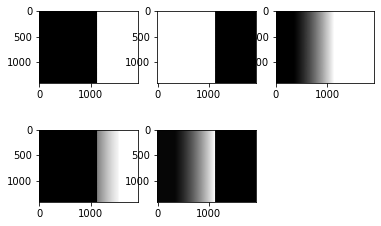

In [19]:
ret,thresh1=cv2.threshold(img,127,255,cv2.THRESH_BINARY)
plt.subplot(2,3,1), plt.imshow(thresh1, 'gray')
ret,thresh2=cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
plt.subplot(2,3,2), plt.imshow(thresh2, 'gray')
ret,thresh3=cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
plt.subplot(2,3,3), plt.imshow(thresh3, 'gray')
ret,thresh4=cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
plt.subplot(2,3,4), plt.imshow(thresh4, 'gray')
ret,thresh5=cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)
plt.subplot(2,3,5), plt.imshow(thresh5, 'gray')
# plt.show()

## 3.2 自适应阀值

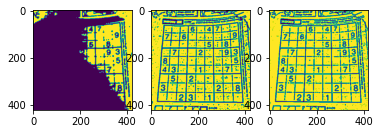

In [20]:
img = cv2.imread('dave.jpg', 0)
img = cv2.medianBlur(img,5)
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
plt.subplot(1,3,1), plt.imshow(th1)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)
plt.subplot(1,3,2), plt.imshow(th2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
plt.subplot(1,3,3), plt.imshow(th3)
plt.show()

## 3.3 Otsu's 二值化

In [21]:
img = cv2.imread('noisy2.png', 0)
img.shape

(160, 320)

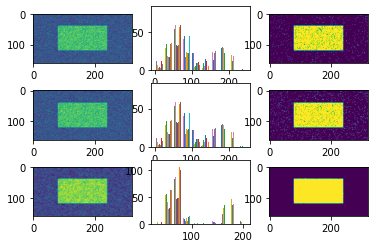

In [22]:
ret1, th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
plt.subplot(3,3,1), plt.imshow(img)
plt.subplot(3,3,2), plt.hist(img)
plt.subplot(3,3,3), plt.imshow(th1)

ret2, th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.subplot(3,3,4), plt.imshow(img)
plt.subplot(3,3,5), plt.hist(img)
plt.subplot(3,3,6), plt.imshow(th2)


blur = cv2.GaussianBlur(img,(5,5),0)
ret3, th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.subplot(3,3,7), plt.imshow(blur)
plt.subplot(3,3,8), plt.hist(blur)
plt.subplot(3,3,9), plt.imshow(th3)

plt.show()

# 4. 图像平滑

## 2D卷积

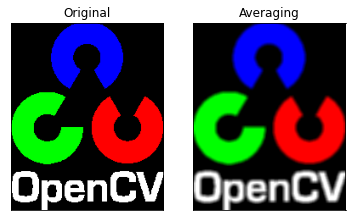

In [23]:
img = cv2.imread('opencv-logo-white.png')
kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(img,-1,kernel)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

## 4.1 平均

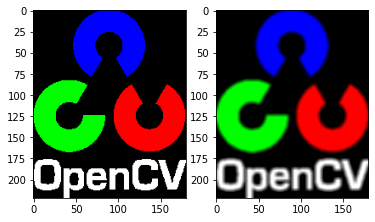

In [24]:
img = cv2.imread('opencv-logo-white.png')
dst = cv2.blur(img, (5,5))
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(dst)
plt.show()

## 4.2 高斯模糊

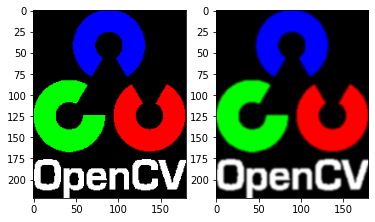

In [25]:
img = cv2.imread('opencv-logo-white.png')
dst = cv2.GaussianBlur(img, (5,5), 0)
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(dst)
plt.show()

## 4.3 中值模糊

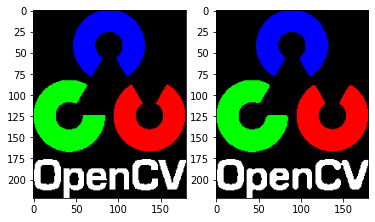

In [26]:
img = cv2.imread('opencv-logo-white.png')
median = cv2.medianBlur(img,5)
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(median)
plt.show()

## 4.4 双边滤波

# 5. 形态学转换

## 5.1 腐蚀

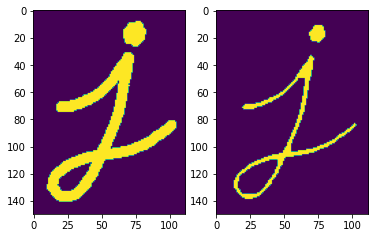

In [27]:
img = cv2.imread('j.png', 0)
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img, kernel, iterations=1)
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(erosion)
plt.show()

## 5.2 膨胀

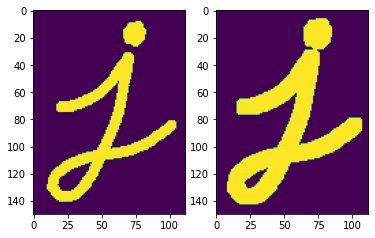

In [28]:
img = cv2.imread('j.png', 0)
kernel = np.ones((5,5), np.uint8)
dilation = cv2.dilate(img,kernel,iterations=1)
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(dilation)
plt.show()

## 5.3 开运算

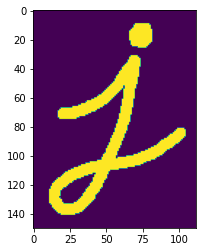

In [29]:
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
plt.imshow(opening)

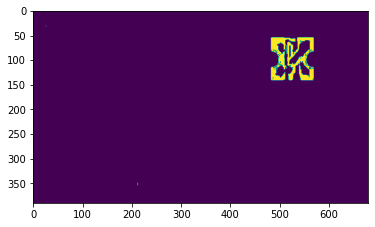

In [30]:
img2 = cv2.imread('hycdn1.jpeg')
img3 = cv2.cvtColor(img2, cv2.COLOR_BGR2HSV)
lower_blue=np.array([0, 0, 30])
upper_blue=np.array([255,120,80])
mask = cv2.inRange(img3, lower_blue, upper_blue)

kernel = np.ones((1,1), np.uint8)
opening_mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

# kernel2 = np.ones((30,30), np.uint8)
# close_mask = cv2.morphologyEx(opening_mask, cv2.MORPH_CLOSE, kernel)
plt.imshow(opening_mask)

## 5.4 闭运算

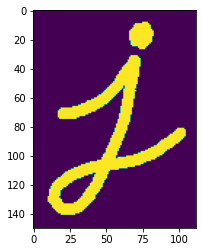

In [31]:
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
plt.imshow(closing)

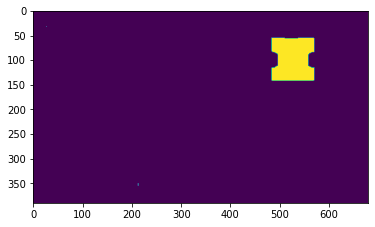

In [32]:
img2 = cv2.imread('hycdn1.jpeg')
img3 = cv2.cvtColor(img2, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(img3, lower_blue, upper_blue)

kernel = np.ones((20,20), np.uint8)
close_mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

plt.imshow(close_mask)

## 5.5 形态学梯度

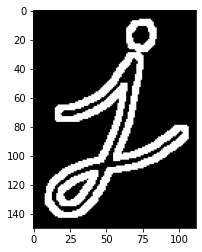

In [33]:
img = cv2.imread('j.png')
kernel = np.ones((5,5), np.uint8)
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
plt.imshow(gradient)

## 5.6 礼帽

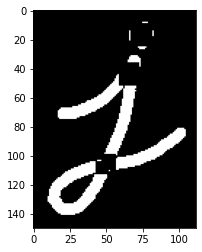

In [34]:
img = cv2.imread('j.png')
kernel = np.ones((9,9), np.uint8)
tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)
plt.imshow(tophat)

## 5.7 黑帽

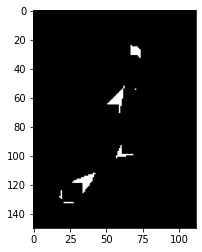

In [35]:
img = cv2.imread('j.png')
kernel = np.ones((9,9), np.uint8)
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)
plt.imshow(blackhat)

# 6. 图像金字塔

## 6.1 高斯金字塔

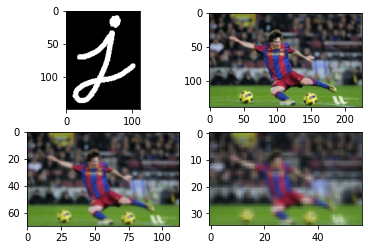

In [36]:
img1 = cv2.imread('messi5.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_RGB2BGR)
plt.subplot(221), plt.imshow(img)
img2 = cv2.pyrDown(img1)
plt.subplot(222), plt.imshow(img2)
img3 = cv2.pyrDown(img2)
plt.subplot(223), plt.imshow(img3)
img4 = cv2.pyrDown(img3)
plt.subplot(224), plt.imshow(img4)
plt.show()

## 6.2 拉普拉斯金字塔

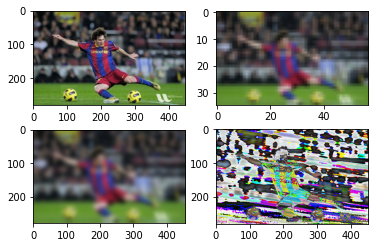

In [37]:
org = cv2.imread('messi5.jpg')
org = cv2.cvtColor(org, cv2.COLOR_RGB2BGR)
plt.subplot(221), plt.imshow(org)

down1 = cv2.pyrDown(org)
down2 = cv2.pyrDown(down1)
down3 = cv2.pyrDown(down2)
plt.subplot(222), plt.imshow(down3)


down_up1 = cv2.pyrUp(down3)
down_up2 = cv2.pyrUp(down_up1)
down_up3 = cv2.pyrUp(down_up2)
plt.subplot(223), plt.imshow(down_up3)
down_up3.resize((280,450,3))
img = org - down_up3
plt.subplot(224), plt.imshow(img)
plt.show()

# 7. OpenCV中的轮廓

## 7.1 初识轮廓

cv2.findContours()，cv2.drawContours()

/Users/tianjun/.pyenv/versions/3.9.1/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:736: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.array(x, subok=True, copy=copy)


TypeError: Image data of dtype object cannot be converted to float

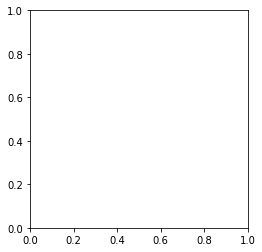

In [43]:
image, contours = cv2.findContours(opening_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
img